<a href="https://colab.research.google.com/github/AlexandraVybornova/AIminorPythonHW/blob/main/LR1_Minor.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Лабораторная работа №1
- датасет
- бизнес-задача
- задача МО
- метрики качества
- EDA


# Бизнес-постановка задачи
Предсказание цены на недвижимость в зависимости от характеристик объекта недвижимости (количества комнат, размера помещения, этажа и т.д.).

#Постановка ML-задачи
Задача регрессии

#Метрики
Каждая метрика регрессии имеет недостатки, поэтому считаю полезным использовать несколько метрик для оценки качества получившихся моделей предсказания.

MAE (Mean Absolute Error) - легко интерпритируемая метрика задачи регрессии, так как покажет абсолютную разницу между предсказанным и фактическим значением цены на недвижимость. Также она менее чувствительна к выбросам, чем MSE.

MSE (Mean Squared Error) - метрика, принцип которой похож на MAE, и также поможет оценить качество предстказания цены недвижимости, однако обладает большей контрастностью и может сильнее подчеркнуть разность между прогнозируемым и фактическим значением. Но она сильнее, чем MAE чувствительна к выбросам.

R^2 (коэффициент детерминации) - измеряет долю дисперсии зависимой переменной, которая объясняется моделью регрессии. Она также хорошо интерпритирует модели и позволяет их сранивать (чем ближе к 1, тем лучше модель объясняет данные). Коэффициент детерминации показывает долю (можно перевести в проценты, домножив коэффициент на 100%)изменчивости цены на недвижимость, и на сколько она объясняется характеристиками датасета. R-квадрат помогает интерпретировать, насколько будущая модель соответствует данным.

#Выбранные метрики:
- MAE
- MSE
- R^2

#EDA анализ

In [13]:
#Подключение необходимых библиотек
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [14]:
#Подключение датасета
df = pd.read_csv('/content/drive/MyDrive/AI_Minor_ML/Housing.csv')

In [15]:
#Демонстрация первых строк датасета
df.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7229300521,20141013T000000,231300.0,2,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


In [16]:
#Размер датасета
df.shape

(21613, 21)

Датасет состоит из 21 колонки и 21613 строк.
Он удовлетворяет условию выбора датасета в более 10 колонок и более 1000 строк.

In [17]:
#Набор колонок датасета
df.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

Датасет имеет 21 колонок, которых предположительно достаточно для построения регрессионной модели. Он содержит признаки (цена, количество спален и ванных комнат, площадь жилья и участка, наличие водоёма рядом с домом, оценка состояния и другие), которые пригодятся при обучении модели предсказания цены недвижимости.

In [20]:
#Типы данных атрибутов датасета
df.dtypes

id                 int64
date              object
price            float64
bedrooms           int64
bathrooms        float64
sqft_living        int64
sqft_lot           int64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object

In [22]:
#Проверка на пустые значения
df.isnull().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

В датасете отсутствуют пропущенные значения.

In [23]:
#Получение базовых стастических характеристик датасета
df.describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580306e+09,5.400886e+05,3.370795,2.114757,2079.899736,1.510697e+04,1.494309,0.007542,0.234303,3.409430,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
std,2.876570e+09,3.671268e+05,0.930105,0.770163,918.440897,4.142051e+04,0.539989,0.086517,0.766318,0.650743,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631
min,1.000102e+06,7.500000e+04,0.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,1.000000,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,3.000000,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,4.500000e+05,3.000000,2.250000,1910.000000,7.618000e+03,1.500000,0.000000,0.000000,3.000000,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,6.450000e+05,4.000000,2.500000,2550.000000,1.068800e+04,2.000000,0.000000,0.000000,4.000000,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,7.700000e+06,33.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,4.000000,5.000000,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000


Исходя из полученных базовых статистик, получаем первоначальное представление о датасете. Например, средняя цена недвижимости в датасете равна **540,088** долларов, средняя площадь жилой зоны равна **2079** квадратных футов, максимальное число спален равно 33, а среднее - приблизительно 3.

#Визуализации, как часть EDA анализа

In [25]:
# Установка стилей seaborn
sns.set(style='whitegrid')

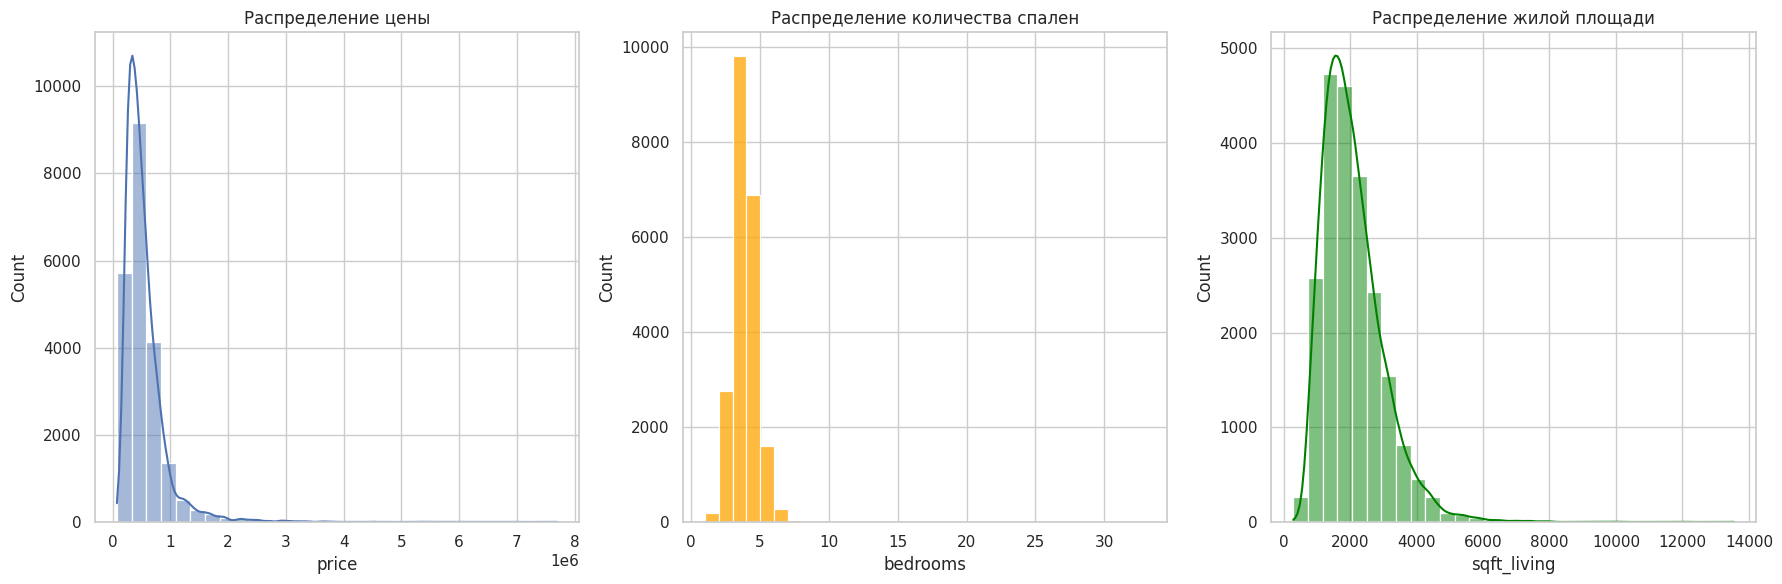

In [32]:
# Создание фигуры и осей для графиков
fig, axes = plt.subplots(1, 3, figsize=(18, 6))


# Гистограмма цены
sns.histplot(df['price'], bins=30, kde=True, ax=axes[0])
axes[0].set_title('Распределение цены')

# Гистограмма количества спален
sns.histplot(df['bedrooms'], bins=range(1, df['bedrooms'].max() + 1), kde=False, color='orange', ax=axes[1])
axes[1].set_title('Распределение количества спален')

# Гистограмма жилой площади
sns.histplot(df['sqft_living'], bins=30, kde=True, color='green', ax=axes[2])
axes[2].set_title('Распределение жилой площади')

# Отображение графиков
plt.tight_layout()
plt.show()

**Первая диаграмма "Распределение цен на недвижимость"** имеет вершину смещенную влево, поэтому можно сделать вывод, что большинство цен сосредоточено в более низком ценовом диапазоне. Однако с небольшим количеством объектов недвижимости, имеющих очень высокую стоимость, так как распределение имеет длинный правый хвост, указывающий на наличие объектов с очень высокой стоимостью.

**Вторая гистограмма "Распределение количества спален"** показывает, что большинство объектов недвижимости имеют от 2 до 4 спален. Наблюдается небольшое количество объектов с очень большим количеством спален, что может указывать на наличие аномалий.

**Третья гистограмма "Распределение жилой площади"** указывает, что большинство объектов недвижимости имеют площадь от 1500 до 2500 квадратных футов. Также у гистограммы наблюдается длинный хвост, уходящий вправо до 8000 квадратных футов, что свидетельствует об анамалиях в данных.

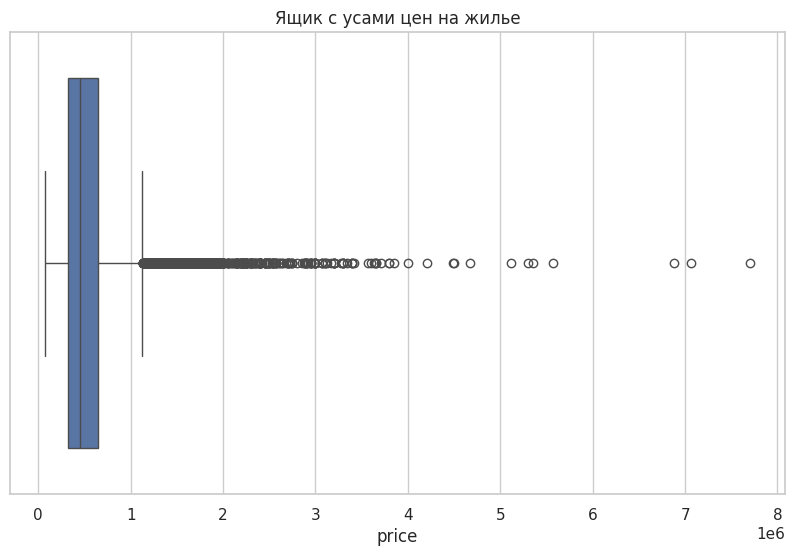

In [44]:
# Ящик с усами для цен
plt.figure(figsize=(10, 6))
sns.boxplot(x='price', data=df)
plt.title('Ящик с усами цен на жилье')
plt.show()

**Ящик с усами цен на жилье** показывает широкий диапазон цен, с значительным количеством выбросов на верхнем конце. Это означает, что, хотя большинство цен на жилье находятся в определенном диапазоне, есть несколько объектов недвижимости, которые значительно дороже среднего.

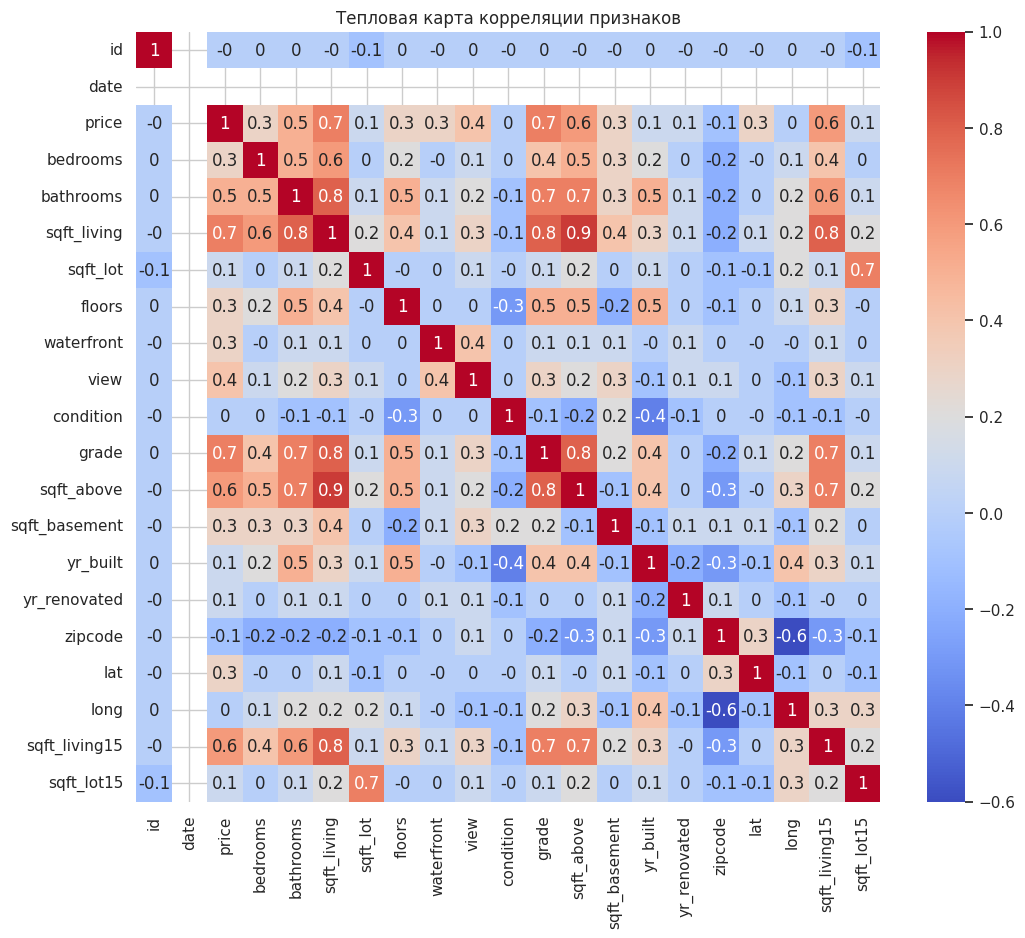

In [43]:
# Преобразование всех столбцов в числовой тип
df = df.apply(pd.to_numeric, errors='coerce')

# Тепловая карта корреляций
plt.figure(figsize=(12, 10))
corr_matrix = df.corr().round(1)
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Тепловая карта корреляции признаков')
plt.show()

Исходя из визуализации **тепловой карты**, наиболее связанными с ценой признаками являются
- жилая площадь,
- количество ванных комнат,
- оценка из рейтинга,
- жилая площадь над уровнем земли,
- размер жилой площади 15 ближайших объектов недвижимости.

#Вывод
Данные имеют большое количество анамальных выбросов, в том числе и в целевом параметре "цена". После построения корреляционной тепловой карты видно, какие признаки наиболее связаны с атрибутом цена. Скорее всего, они станут предикторами для будущей регрессионной модели.